**PROYECTO FINAL ML ESPOL: SCRORING CREDITICIO**

**Objetivo:**
El objetivo de esta tarea es realizar un análisis integral que abarque desde el análisis exploratorio de datos (EDA) hasta el modelamiento del score crediticio. Se debe extraer hallazgos clave del EDA, construir un modelo predictivo de scoring crediticio, y presentar resultados que puedan aportar valor en la toma de decisiones gerenciales.

a. Cargamos librerías necesarias para el análisis

In [13]:
import pandas as pd # manipulación y análisis de datos
import numpy as np # manejo de arrays
import matplotlib.pyplot as plt # creación de gráficos y visualizaciones
import seaborn as sns # visualizaciones más atractivas y complejas basadas en matplotlib
from sklearn.preprocessing import StandardScaler # normalizar las características (escalarlas a la misma escala)
from sklearn.model_selection import train_test_split # dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LogisticRegression # usar el modelo de regresión logística
from sklearn.metrics import accuracy_score # evaluar la precisión del modelo
from sklearn.svm import SVC # clasificador de máquinas de soporte (SVM)
from xgboost import XGBClassifier # eficiente para tareas de clasificación
import time # calcular tiempo transcurrido de ejecución de cada modelo de ML

b. Carga de datos

In [14]:
# Cargar archivos CSV
csv_train = pd.read_csv("cs-training.csv")
csv_test = pd.read_csv("cs-test.csv")

# Mostrar primeras filas
csv_train.head()
csv_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


**ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

a. Cambiamos nombres de los campos

In [15]:
#PRUEBA
csv_test = csv_test.rename(columns={
    "Unnamed: 0": "ID",
    "SeriousDlqin2yrs": "atraso_mayor_90_dias_grave",
    "RevolvingUtilizationOfUnsecuredLines": "porcent_saldo_tarj_cred",
    "age": "edad",
    "NumberOfTime30-59DaysPastDueNotWorse": "num_atraso_30_59_dias_bajo",
    "DebtRatio": "porcent_deuda_ingresos",
    "MonthlyIncome": "ingreso_mensual",
    "NumberOfOpenCreditLinesAndLoans": "num_creditos_abiertos",
    "NumberOfTimes90DaysLate": "num_atraso_mayor_90_dias_grave",
    "NumberRealEstateLoansOrLines": "num_creditos_hipotecarios",
    "NumberOfTime60-89DaysPastDueNotWorse": "num_atraso_60_89_dias_media",
    "NumberOfDependents": "num_familiares"
})
# Verificar los nuevos nombres de las columnas
csv_test.columns

Index(['ID', 'atraso_mayor_90_dias_grave', 'porcent_saldo_tarj_cred', 'edad',
       'num_atraso_30_59_dias_bajo', 'porcent_deuda_ingresos',
       'ingreso_mensual', 'num_creditos_abiertos',
       'num_atraso_mayor_90_dias_grave', 'num_creditos_hipotecarios',
       'num_atraso_60_89_dias_media', 'num_familiares'],
      dtype='object')

In [16]:
#ENTRENAMIENTO
csv_train = csv_train.rename(columns={
    "Unnamed: 0": "ID",
    "SeriousDlqin2yrs": "atraso_mayor_90_dias_grave",
    "RevolvingUtilizationOfUnsecuredLines": "porcent_saldo_tarj_cred",
    "age": "edad",
    "NumberOfTime30-59DaysPastDueNotWorse": "num_atraso_30_59_dias_bajo",
    "DebtRatio": "porcent_deuda_ingresos",
    "MonthlyIncome": "ingreso_mensual",
    "NumberOfOpenCreditLinesAndLoans": "num_creditos_abiertos",
    "NumberOfTimes90DaysLate": "num_atraso_mayor_90_dias_grave",
    "NumberRealEstateLoansOrLines": "num_creditos_hipotecarios",
    "NumberOfTime60-89DaysPastDueNotWorse": "num_atraso_60_89_dias_media",
    "NumberOfDependents": "num_familiares"
})
# Verificar los nuevos nombres de las columnas
csv_train.columns

Index(['ID', 'atraso_mayor_90_dias_grave', 'porcent_saldo_tarj_cred', 'edad',
       'num_atraso_30_59_dias_bajo', 'porcent_deuda_ingresos',
       'ingreso_mensual', 'num_creditos_abiertos',
       'num_atraso_mayor_90_dias_grave', 'num_creditos_hipotecarios',
       'num_atraso_60_89_dias_media', 'num_familiares'],
      dtype='object')

b. Estadística de los registros

In [17]:
# Estadísticas descriptivas del conjunto de entrenamiento para detectar atípicos
csv_train.describe()

,ID,atraso_mayor_90_dias_grave,porcent_saldo_tarj_cred,edad,num_atraso_30_59_dias_bajo,porcent_deuda_ingresos,ingreso_mensual,num_creditos_abiertos,num_atraso_mayor_90_dias_grave,num_creditos_hipotecarios,num_atraso_60_89_dias_media,num_familiares
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [18]:
# Revisar valores nulos
csv_train.isnull().sum()

ID                                    0
atraso_mayor_90_dias_grave            0
porcent_saldo_tarj_cred               0
edad                                  0
num_atraso_30_59_dias_bajo            0
porcent_deuda_ingresos                0
ingreso_mensual                   29731
num_creditos_abiertos                 0
num_atraso_mayor_90_dias_grave        0
num_creditos_hipotecarios             0
num_atraso_60_89_dias_media           0
num_familiares                     3924
dtype: int64

c. Visualización de estructuración de campos con registros atípicos

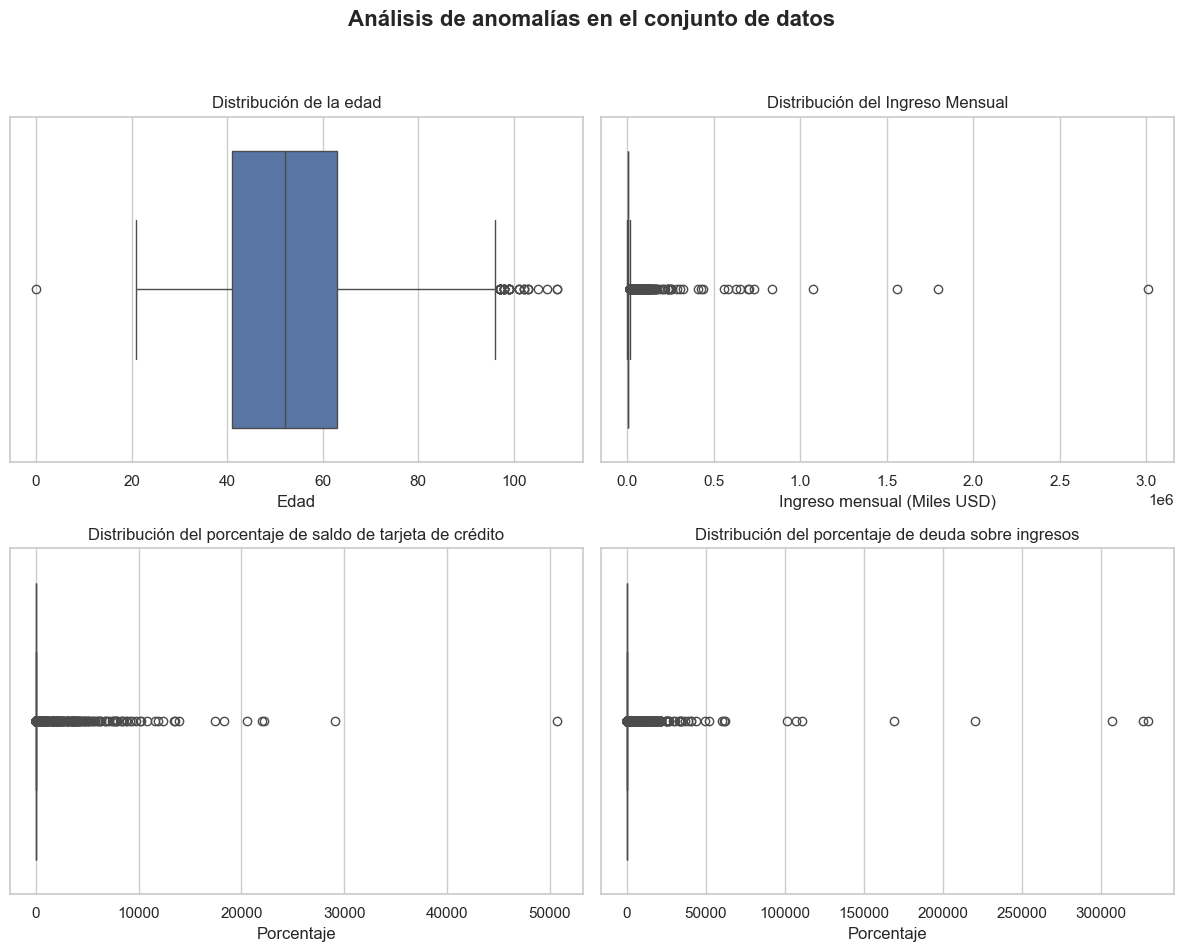

In [19]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura con múltiples subgráficas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Análisis de anomalías en el conjunto de datos', fontsize=16, fontweight='bold')

# Gráfico de cajas para la edad
sns.boxplot(ax=axes[0, 0], x=csv_train['edad'])
axes[0, 0].set_title('Distribución de la edad')
axes[0, 0].set_xlabel('Edad')

# Gráfico de cajas para el ingreso mensual
sns.boxplot(ax=axes[0, 1], x=csv_train['ingreso_mensual'])
axes[0, 1].set_title('Distribución del Ingreso Mensual')
axes[0, 1].set_xlabel('Ingreso mensual (Miles USD)')

# Gráfico de cajas para el porcentaje de saldo de tarjeta de crédito
sns.boxplot(ax=axes[1, 0], x=csv_train['porcent_saldo_tarj_cred'])
axes[1, 0].set_title('Distribución del porcentaje de saldo de tarjeta de crédito')
axes[1, 0].set_xlabel('Porcentaje')

# Gráfico de cajas para el porcentaje de deuda sobre ingresos
sns.boxplot(ax=axes[1, 1], x=csv_train['porcent_deuda_ingresos'])
axes[1, 1].set_title('Distribución del porcentaje de deuda sobre ingresos')
axes[1, 1].set_xlabel('Porcentaje')

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**LIMPEZA DE DATOS**

a. Segregación y tratamiento de registros en blanco

In [20]:
# Inicializar training_filtrado con una copia del DataFrame original
training_filtrado = csv_train

# Columnas filtrar
for columna in ['ingreso_mensual', 'porcent_saldo_tarj_cred', 'porcent_deuda_ingresos', 'edad']:
    Q1 = training_filtrado[columna].quantile(0.25)
    Q3 = training_filtrado[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    training_filtrado = training_filtrado[(training_filtrado[columna] >= limite_inferior) & 
                                          (training_filtrado[columna] <= limite_superior)]

# Rellenar valores nulos con la media
training_filtrado['num_familiares'] = training_filtrado['num_familiares'].fillna(training_filtrado['num_familiares'].mean())
training_filtrado['ingreso_mensual'] = training_filtrado['ingreso_mensual'].fillna(training_filtrado['ingreso_mensual'].mean())

# Mostrar el nuevo DataFrame filtrado
training_filtrado.describe()



,ID,atraso_mayor_90_dias_grave,porcent_saldo_tarj_cred,edad,num_atraso_30_59_dias_bajo,porcent_deuda_ingresos,ingreso_mensual,num_creditos_abiertos,num_atraso_mayor_90_dias_grave,num_creditos_hipotecarios,num_atraso_60_89_dias_media,num_familiares
count,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000
mean,75007.233771,0.067367,0.327692,51.225679,0.388241,0.310104,6001.239273,8.549013,0.223703,0.969574,0.199039,0.835127
std,43312.173528,0.250658,0.349633,14.580695,3.673749,0.225628,3190.162776,5.038290,3.642672,0.999463,3.627105,1.136423
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37645.750000,0.000000,0.033775,40.000000,0.000000,0.134951,3534.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74899.500000,0.000000,0.171956,51.000000,0.000000,0.282723,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112543.750000,0.000000,0.569742,62.000000,0.000000,0.446069,8000.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,1.411533,95.000000,98.000000,1.007427,15520.000000,57.000000,98.000000,14.000000,98.000000,20.000000


In [21]:
# Mostrar la estadisticas por campos limpios
training_filtrado.describe()

,ID,atraso_mayor_90_dias_grave,porcent_saldo_tarj_cred,edad,num_atraso_30_59_dias_bajo,porcent_deuda_ingresos,ingreso_mensual,num_creditos_abiertos,num_atraso_mayor_90_dias_grave,num_creditos_hipotecarios,num_atraso_60_89_dias_media,num_familiares
count,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000
mean,75007.233771,0.067367,0.327692,51.225679,0.388241,0.310104,6001.239273,8.549013,0.223703,0.969574,0.199039,0.835127
std,43312.173528,0.250658,0.349633,14.580695,3.673749,0.225628,3190.162776,5.038290,3.642672,0.999463,3.627105,1.136423
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37645.750000,0.000000,0.033775,40.000000,0.000000,0.134951,3534.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74899.500000,0.000000,0.171956,51.000000,0.000000,0.282723,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112543.750000,0.000000,0.569742,62.000000,0.000000,0.446069,8000.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,1.411533,95.000000,98.000000,1.007427,15520.000000,57.000000,98.000000,14.000000,98.000000,20.000000


b. Revisión de valores en blanco

In [22]:
training_filtrado.isnull().sum()

ID                                0
atraso_mayor_90_dias_grave        0
porcent_saldo_tarj_cred           0
edad                              0
num_atraso_30_59_dias_bajo        0
porcent_deuda_ingresos            0
ingreso_mensual                   0
num_creditos_abiertos             0
num_atraso_mayor_90_dias_grave    0
num_creditos_hipotecarios         0
num_atraso_60_89_dias_media       0
num_familiares                    0
dtype: int64

c. Visualización de campos limpios

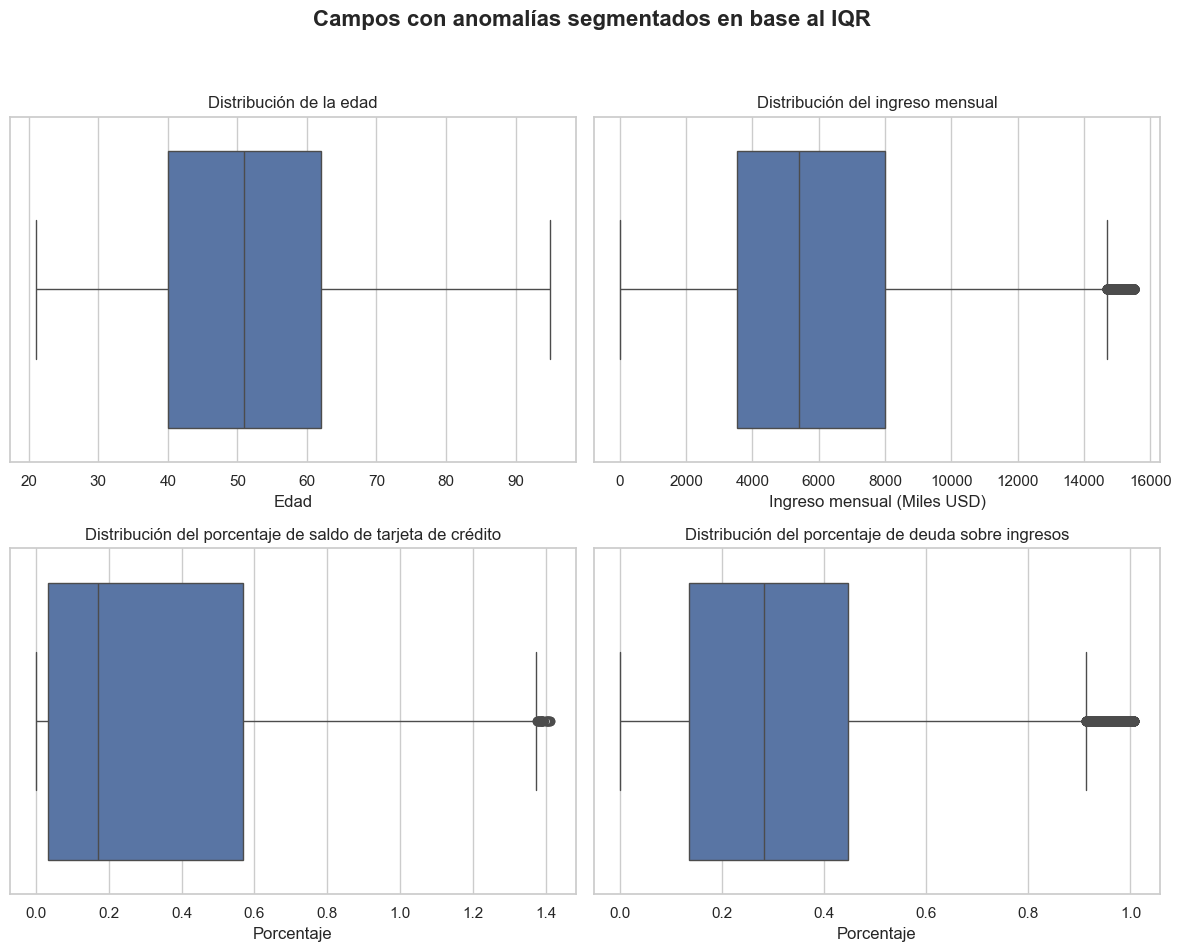

In [23]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura con múltiples subgráficas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Campos con anomalías segmentados en base al IQR', fontsize=16, fontweight='bold')

# Gráfico de cajas para la edad
sns.boxplot(ax=axes[0, 0], x=training_filtrado['edad'])
axes[0, 0].set_title('Distribución de la edad')
axes[0, 0].set_xlabel('Edad')

# Gráfico de cajas para el ingreso mensual
sns.boxplot(ax=axes[0, 1], x=training_filtrado['ingreso_mensual'])
axes[0, 1].set_title('Distribución del ingreso mensual')
axes[0, 1].set_xlabel('Ingreso mensual (Miles USD)')

# Gráfico de cajas para el porcentaje de saldo de tarjeta de crédito
sns.boxplot(ax=axes[1, 0], x=training_filtrado['porcent_saldo_tarj_cred'])
axes[1, 0].set_title('Distribución del porcentaje de saldo de tarjeta de crédito')
axes[1, 0].set_xlabel('Porcentaje')

# Gráfico de cajas para el porcentaje de deuda sobre ingresos
sns.boxplot(ax=axes[1, 1], x=training_filtrado['porcent_deuda_ingresos'])
axes[1, 1].set_title('Distribución del porcentaje de deuda sobre ingresos')
axes[1, 1].set_xlabel('Porcentaje')

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**VISUALIZACIÓN DE DATOS**

a. Histogramas

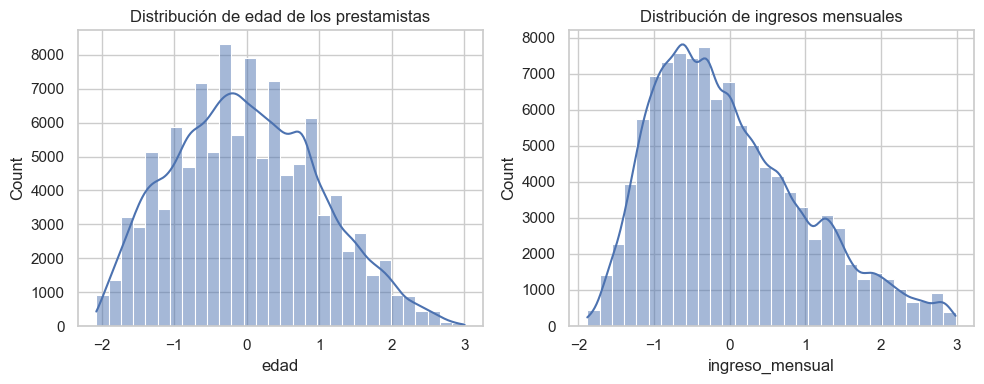

In [54]:
# Crear subgráficos de 1 x 2
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Histograma de la edad
sns.histplot(training_filtrado['edad'], kde=True, bins=30, ax=ax[0])
ax[0].set_title('Distribución de edad de los prestamistas')

# Histograma de Ingresos Mensuales
sns.histplot(training_filtrado['ingreso_mensual'].dropna(), kde=True, bins=30, ax=ax[1])
ax[1].set_title('Distribución de ingresos mensuales')

# Ajustar el layout
plt.tight_layout()
plt.show()


b. Identificación de clientes en un estado grave: retrasos en pagos mayor a 90 días

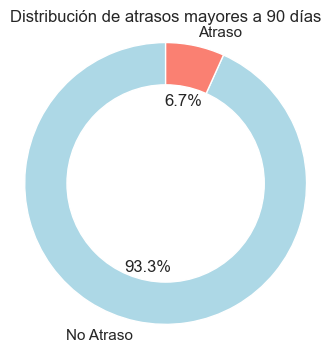

In [25]:
# Contar la cantidad de 0s y 1s
counts = training_filtrado['atraso_mayor_90_dias_grave'].value_counts()

# Definir el gráfico de anillo
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=['No Atraso', 'Atraso'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
center_circle = plt.Circle((0, 0), 0.70, fc='white')  # Crear el círculo central
fig = plt.gcf()
fig.gca().add_artist(center_circle)  # Añadir el círculo central

# Títulos y formato
plt.title('Distribución de atrasos mayores a 90 días')
plt.axis('equal')  # Asegurar que el gráfico sea circular
plt.show()

c. Correlación entre variables

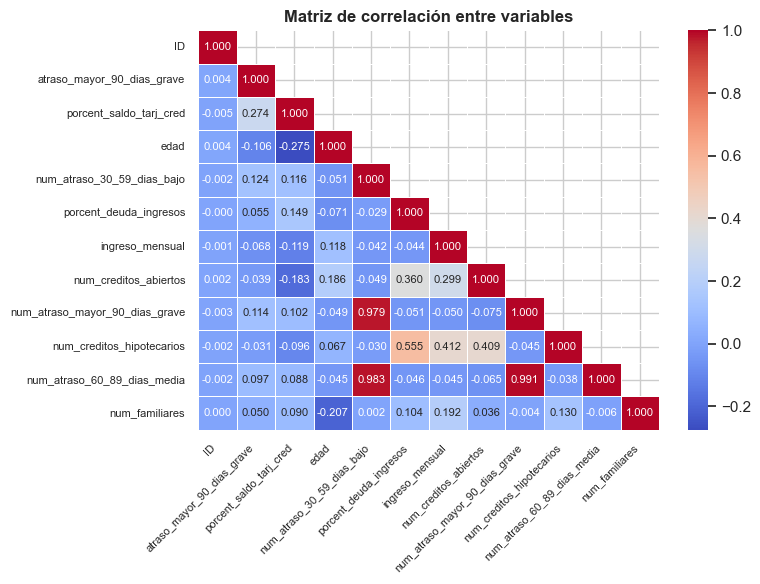

In [57]:
# Matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = training_filtrado.corr()

# Crear una máscara para ocultar la parte superior de la matriz, dejando visible la diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # 'k=1' oculta la parte superior, pero no la diagonal

# Graficar el heatmap
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt=".3f")

# Ajustar el tamaño de las etiquetas en los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Reduce la fuente y ajusta la rotación de los nombres en el eje x
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)  # Reduce la fuente de los nombres en el eje y

plt.title('Matriz de correlación entre variables', fontweight='bold')
plt.tight_layout()
plt.show()


**ESCALADO DE DATOS**

In [27]:
# Seleccionar las columnas numéricas para escalar
cols_to_scale = ['ingreso_mensual', 'porcent_saldo_tarj_cred', 'porcent_deuda_ingresos', 'num_familiares', 'edad']

# Crear el escalador
scaler = StandardScaler()

# Escalar las columnas seleccionadas
training_filtrado[cols_to_scale] = scaler.fit_transform(training_filtrado[cols_to_scale])
# Definir las características (X) y la variable objetivo (y)
X = training_filtrado.drop(columns=['atraso_mayor_90_dias_grave'])  # Excluir la variable objetivo
y = training_filtrado['atraso_mayor_90_dias_grave']  # 'resultado_crediticio' sería la variable que indica si un cliente es "bueno" o "malo" para el crédito

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**ENTRENAMIENTO Y EVALUACIÓN DE MODELOS**

Regresión Logística

In [47]:
# Iniciar el temporizador
inicio = time.time()

# Entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Detener el temporizador y calcular el tiempo transcurrido
fin = time.time()
tiempo_ejecucion_rl = fin - inicio

print(f'Tiempo de ejecución Regresión Logística: {tiempo_ejecucion_rl:.4f} segundos')
print(f'Accuracy Regresión Logística: {accuracy_logreg:.4f}')

Tiempo de ejecución Regresión Logística: 0.1277 segundos
Accuracy Regresión Logística: 0.9352


Support Vector Machine

In [48]:
# Iniciar el temporizador
inicio = time.time()

# Entrenar el modelo
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Detener el temporizador y calcular el tiempo transcurrido
fin = time.time()
tiempo_ejecucion_svm = fin - inicio

print(f'Tiempo de ejecución SVM: {tiempo_ejecucion_svm:.4f} segundos')
print(f'Accuracy SVM: {accuracy_svm:.4f}')

Tiempo de ejecución SVM: 128.3620 segundos
Accuracy SVM: 0.9362


XGBoost

In [49]:
# Iniciar el temporizador
inicio = time.time()

# Entrenar el modelo
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_xgb = xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Detener el temporizador y calcular el tiempo transcurrido
fin = time.time()
tiempo_ejecucion_xgb = fin - inicio

print(f'Tiempo de ejecución XGBoost: {tiempo_ejecucion_xgb:.4f} segundos')
print(f'Accuracy XGBoost: {accuracy_xgb:.4f}')

c:\Users\angel.chiriguaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tiempo de ejecución XGBoost: 0.3635 segundos
Accuracy XGBoost: 0.9348


**RESULTADOS**

Resultados de los algoritmos ML

In [50]:
# Imprimir las accuracies de los modelos
print(f"Accuracy de los Modelos:")
print(f"Regresión Logística: {accuracy_logreg:.4f}")
print(f"SVM: {accuracy_svm:.4f}")
print(f"XGBoost: {accuracy_xgb:.4f}")
# Resultados de las accuracies
modelos = ['Regresión Logística', 'SVM', 'XGBoost']
accuracies = [accuracy_logreg, accuracy_svm, accuracy_xgb]
tiempos = [tiempo_ejecucion_rl, tiempo_ejecucion_svm ,tiempo_ejecucion_xgb]

Accuracy de los Modelos:
Regresión Logística: 0.9352
SVM: 0.9362
XGBoost: 0.9348


Visualización algoritmo con mayor precisión

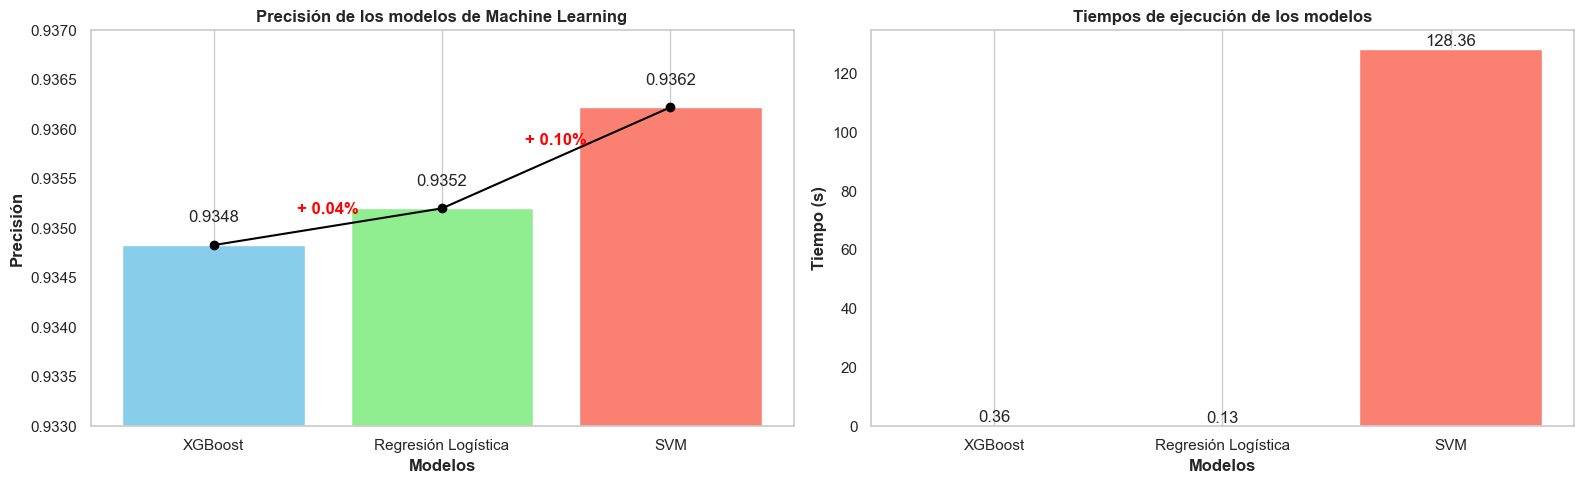

In [55]:
# Ordenar los modelos y accuracies de menor a mayor
ordenados = sorted(zip(accuracies, modelos, tiempos))  # Ordena por accuracies
accuracies_ordenados, modelos_ordenados, tiempos_ordenados = zip(*ordenados)  # Separa los valores ordenados

# Calcular el acumulado para el gráfico de cascada
values = [accuracies_ordenados[0]]
for i in range(1, len(accuracies_ordenados)):
    values.append(values[-1] + (accuracies_ordenados[i] - accuracies_ordenados[i-1]))

# Crear el gráfico de subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico de barras para precisión
ax[0].bar(modelos_ordenados, accuracies_ordenados, color=['skyblue', 'lightgreen', 'salmon'])
ax[0].plot(modelos_ordenados, values, marker='o', color='black')  # Línea de referencia acumulada
ax[0].set_ylim(0.933, 0.937)  # Limitar el eje y para mejor visualización
ax[0].set_title('Precisión de los modelos de Machine Learning', fontweight='bold')
ax[0].set_xlabel('Modelos', fontweight='bold')
ax[0].set_ylabel('Precisión', fontweight='bold')
ax[0].grid(axis='y')

# Añadir los valores de accuracy encima de las barras
for i, acc in enumerate(accuracies_ordenados):
    ax[0].text(i, acc + 0.0002, f'{acc:.4f}', ha='center', va='bottom')

# Añadir las diferencias entre las barras en porcentaje y en color rojo, desplazadas hacia arriba
for i in range(1, len(accuracies_ordenados)):
    diferencia = (accuracies_ordenados[i] - accuracies_ordenados[i - 1]) * 100  # Convertir a porcentaje
    y_position = (accuracies_ordenados[i] + accuracies_ordenados[i - 1]) / 2 + 0.0001  # Incrementar la posición vertical
    ax[0].text(i - 0.5, y_position, f'+ {diferencia:.2f}%', 
             ha='center', va='bottom', fontweight='bold', color='red')

# Gráfico de barras para tiempos de ejecución
ax[1].bar(modelos_ordenados, tiempos_ordenados, color=['skyblue', 'lightgreen', 'salmon'])
ax[1].set_title('Tiempos de ejecución de los modelos', fontweight='bold')
ax[1].set_xlabel('Modelos', fontweight='bold')
ax[1].set_ylabel('Tiempo (s)', fontweight='bold')
ax[1].grid(axis='y')

# Añadir los tiempos encima de las barras
for i, tiempo in enumerate(tiempos_ordenados):
    ax[1].text(i, tiempo + 0.01, f'{tiempo:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Ajustar el layout para evitar superposición
plt.show()

**Conclusión**

El proceso de análisis y preprocesamiento de datos fue fundamental para lograr una alta precisión en todos los modelos. La identificación y eliminación de anomalías, junto con el tratamiento adecuado de registros faltantes y el escalado de datos, permitió que los modelos trabajaran con un dataset limpio y bien estructurado.

Durante el proyecto, se evaluaron tres modelos de Machine Learning: Regresión Logística, SVM (Máquinas de Soporte Vectorial) y XGBoost. Los resultados de precisión (accuracy) obtenidos fueron 0.9352, 0.9362 y 0.9348, respectivamente. A pesar de que todos los modelos presentan un rendimiento similar, el modelo de SVM se destaca ligeramente con la mayor precisión, aunque la diferencia es mínima. Sin embargo, es importante considerar el tiempo de ejecución de cada modelo: mientras que la Regresión Logística fue notablemente rápida, con solo 0.1277 segundos, el SVM requirió 128.3620 segundos, un tiempo significativamente mayor. XGBoost, por su parte, tuvo un tiempo de ejecución de 0.3635 segundos. Este análisis sugiere que, a pesar de su ligera superioridad en precisión, el modelo SVM podría no ser la opción más eficiente en términos de tiempo, lo que resalta la necesidad de balancear precisión y rendimiento en la selección del modelo más adecuado para tareas de Machine Learning.